In [2]:
import numpy as np
import pandas as pd

In [16]:
dataset = pd.read_excel("C:/Users/Asus/Documents/MMAI/831_AIinMarketing/Team_project/MMM_Blender_data_2.xlsx")

In [17]:
dataset

,Date,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($)
0,Jan-2008,6237000,181222.548442,12152.540107,24986.912760,135.0
1,Feb-2008,6115500,179104.353164,57353.376363,17574.385360,135.0
2,Mar-2008,10577250,222756.223235,146794.245435,16016.022899,135.0
3,Apr-2008,13473000,188266.818315,376459.468169,29689.694160,135.0
4,May-2008,6258525,210038.289741,21297.573231,17606.991440,136.5
...,...,...,...,...,...,...
145,Feb-2020,9486000,188038.562233,314738.939174,20633.865171,180.0
146,Mar-2020,4230000,193748.973119,61583.121445,17514.258530,180.0
147,Apr-2020,9504000,199048.223805,324562.541889,16122.631683,180.0
148,May-2020,3861000,192013.052245,79169.843365,19993.295700,180.0


In [18]:
dataset.describe()

,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($)
count,1.500000e+02,150.000000,150.000000,150.000000,150.000000
mean,7.387596e+06,200172.675917,123295.713622,19780.483463,158.150000
std,2.794341e+06,9486.447152,88241.498625,4875.143064,13.732799
min,7.854000e+05,176450.216326,876.373521,4716.529170,135.000000
25%,5.835769e+06,193755.149356,54933.854835,16695.656714,145.875000
50%,7.635600e+06,199504.100334,104538.370602,19926.875169,158.250000
75%,9.482625e+06,206391.579637,172074.250144,22933.492770,169.500000
max,1.380225e+07,222756.223235,442144.852073,32794.574130,180.000000


In [19]:
y = dataset['Sales ($)']
dataset.drop(columns=['Sales ($)','Price ($)','Date'], inplace=True)
X = dataset

In [20]:
X

,TV_ads ($),online_ads ($),Print_ads ($)
0,181222.548442,12152.540107,24986.912760
1,179104.353164,57353.376363,17574.385360
2,222756.223235,146794.245435,16016.022899
3,188266.818315,376459.468169,29689.694160
4,210038.289741,21297.573231,17606.991440
...,...,...,...
145,188038.562233,314738.939174,20633.865171
146,193748.973119,61583.121445,17514.258530
147,199048.223805,324562.541889,16122.631683
148,192013.052245,79169.843365,19993.295700


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test,predictions)

print("MSE:",mse)
print("R2:",r2)

MSE: 1847697578752.3103
R2: 0.7762462807353612


In [28]:
feature_importance = pd.DataFrame({'Feature':X.columns,'Importance':model.feature_importances_})
print(feature_importance)

          Feature  Importance
0      TV_ads ($)    0.068073
1  online_ads ($)    0.889399
2   Print_ads ($)    0.042529


In [37]:
len(predictions)

30

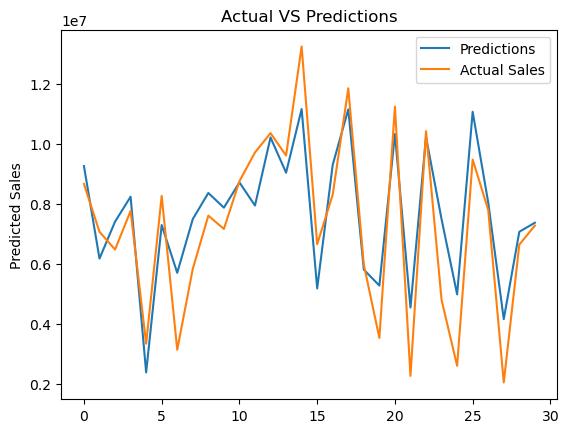

In [42]:
import matplotlib.pyplot as plt

x = np.arange(30)
plt.plot(x,predictions, label='Predictions')
plt.plot(x,y_test,label='Actual Sales')
plt.ylabel("Predicted Sales")
plt.legend()
plt.title('Actual VS Predictions')

plt.show()

In [43]:
from lightgbm import LGBMRegressor

model2 = LGBMRegressor()
model2.fit(X_train,y_train)

LGBMRegressor()

In [44]:
predictions2 = model2.predict(X_test)
mse = mean_squared_error(y_test,predictions2)
r2 = r2_score(y_test,predictions2)

print("MSE:",mse)
print("R2:",r2)

MSE: 1669291693603.048
R2: 0.7978509961389519


In [45]:
feature_importance2 = pd.DataFrame({'Feature':X.columns,'Importance':model.feature_importances_})
print(feature_importance2)

          Feature  Importance
0      TV_ads ($)    0.068073
1  online_ads ($)    0.889399
2   Print_ads ($)    0.042529


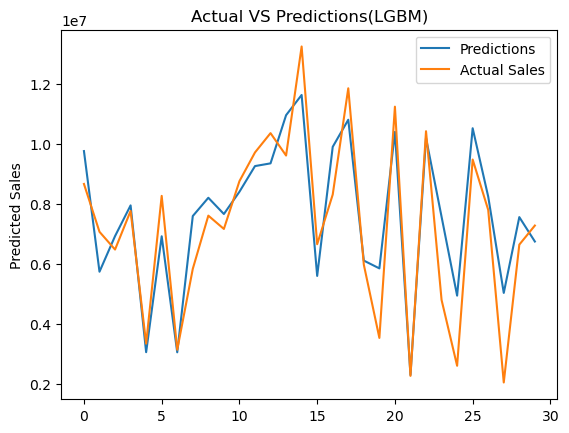

In [46]:
x = np.arange(30)
plt.plot(x,predictions2, label='Predictions')
plt.plot(x,y_test,label='Actual Sales')
plt.ylabel("Predicted Sales")
plt.legend()
plt.title('Actual VS Predictions(LGBM)')

plt.show()

In [47]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
predictions3 = model3.predict(X_test)
mse = mean_squared_error(y_test,predictions3)
r2 = r2_score(y_test,predictions3)

print("MSE:",mse)
print("R2:",r2)

MSE: 2074757807027.475
R2: 0.7487495890917246


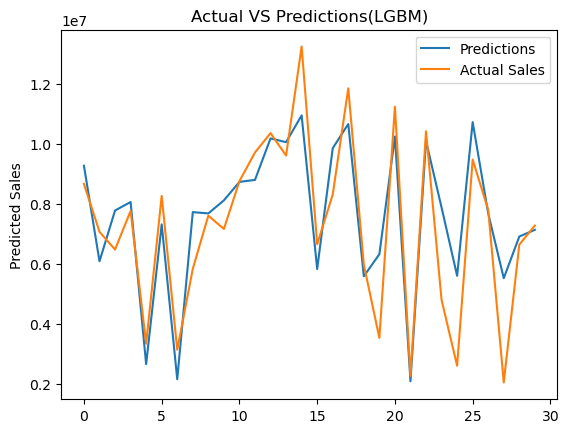

In [50]:
x = np.arange(30)
plt.plot(x,predictions3, label='Predictions')
plt.plot(x,y_test,label='Actual Sales')
plt.ylabel("Predicted Sales")
plt.legend()
plt.title('Actual VS Predictions(LGBM)')

plt.show()